In [1]:
# Importing our dataset from scikit learn
from sklearn.datasets import load_iris

In [2]:
# import pandas to load the dataset as a dataframe
import pandas as pd
iris_flower = load_iris() # we are assigning iris_f;lower to 'load-iris()' instance

# lets load the feature dataset
features = pd.DataFrame(iris_flower.data, columns=iris_flower.feature_names)
# lets load the target dataset
target = iris_flower.target


In [3]:
# lets view our data from first five rows

features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#lets view the target dataset
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


`Handling missing values`

In [5]:
#checking for missing values
features.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# lets take a snapshot of our dataset 
\
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


* It is evident that this data does not have missing value but we are going to introduce missing values 

In [7]:
# Lets intrpoduce the missing values 
features.loc[10, "sepal length (cm)"] = None
features.loc[50:54, "sepal width (cm)"] = None
features.loc[100:102, "petal length (cm)"] = None


In [8]:
# lets check for missing values again
features.isnull().sum()

sepal length (cm)    1
sepal width (cm)     5
petal length (cm)    3
petal width (cm)     0
dtype: int64

In [9]:
# lets handle the missing values using simple imputer

from sklearn.impute import SimpleImputer


In [10]:
# Now lets create an instance of the imputer class using "mean" and meadian as strategy for imputation 
impute_mean = SimpleImputer(strategy="mean")

impute_median = SimpleImputer(strategy="median")

In [11]:
# lets apply the defined instances above
features[["sepal length (cm)"]] = impute_mean.fit_transform(features[["sepal length (cm)"]])
features[["sepal width (cm)"]] = impute_mean.fit_transform(features[["sepal width (cm)"]])
features[["petal length (cm)"]] = impute_median.fit_transform(features[["petal length (cm)"]])

In [12]:
features.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

` 2. Handling outliers`

``Method of Handling Outliers``

1. Removal
2. Capping(Winzorizing or clipping)

In [13]:
from scipy import stats # This is a statistics library
z_scores = stats.zscore(features) # Calculate the z-score for the whole dataframe

# lets print the z-scores
print(z_scores)

[[-9.05163302e-01  1.02053680e+00 -1.34014407e+00 -1.31544430e+00]
 [-1.14773404e+00 -1.44643012e-01 -1.34014407e+00 -1.31544430e+00]
 [-1.39030478e+00  3.21428915e-01 -1.39764453e+00 -1.31544430e+00]
 [-1.51159016e+00  8.83929516e-02 -1.28264361e+00 -1.31544430e+00]
 [-1.02644867e+00  1.25357277e+00 -1.34014407e+00 -1.31544430e+00]
 [-5.41307191e-01  1.95268066e+00 -1.16764268e+00 -1.05217993e+00]
 [-1.51159016e+00  7.87500841e-01 -1.34014407e+00 -1.18381211e+00]
 [-1.02644867e+00  7.87500841e-01 -1.28264361e+00 -1.31544430e+00]
 [-1.75416090e+00 -3.77678975e-01 -1.34014407e+00 -1.31544430e+00]
 [-1.14773404e+00  8.83929516e-02 -1.28264361e+00 -1.44707648e+00]
 [ 0.00000000e+00  1.48660873e+00 -1.28264361e+00 -1.31544430e+00]
 [-1.26901941e+00  7.87500841e-01 -1.22514315e+00 -1.31544430e+00]
 [-1.26901941e+00 -1.44643012e-01 -1.34014407e+00 -1.44707648e+00]
 [-1.87544627e+00 -1.44643012e-01 -1.51264545e+00 -1.44707648e+00]
 [-5.61657085e-02  2.18571662e+00 -1.45514499e+00 -1.31544430e

`Removal Method`

In [14]:
handle_outliers_1 = features.copy()
features_with_removed_outliers = handle_outliers_1[abs((z_scores < 3).all(axis=1))] # .all(axis = 1) is signifying that I am selecting all the columns

In [15]:
#lets view 
features_with_removed_outliers.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


`capping method`

In [17]:
import numpy as np 

#lets create a copy of our dataframe

handle_outliers_2 = features.copy()

# lets define the threshold first

threshold = 3

# lets apply capping to our calculated z-scores
# lets apply a little bit of complexity to it incase you are going to be selcting the numeric columns in your own dataset, it works here but doesnt reallly applies to this case though.
# creating a loop to handle both th limits and the capping of the selected solumns

for i, col in enumerate(handle_outliers_2.select_dtypes(include=[np.number]).columns):
    # lets select the outliers
    outliers = handle_outliers_2[col][abs(stats.zscore(handle_outliers_2[col])) > threshold]

    # lets cap anything outside the treshold 
    handle_outliers_2[col] = np.where(np.abs(z_scores.iloc[:, i]) > threshold,
    handle_outliers_2[col].clip(lower=outliers.min(), upper=outliers.max()), handle_outliers_2[col]) #Using clip to cap outliers within the IQR range.

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [18]:
handle_outliers_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Feature Scaling (Normalization/ Standardization)**

In [19]:
# lets import the scaling libraries

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
# lets standardize the dataset

# lets create a copy our dataset
standardize_features = features.copy()

In [21]:
# create an instance of the standard scaler class

scaler = StandardScaler()
# lets say amount to apply it to a particular column

# standardized_sepal_length = scaler.fit_transform(standardized_features[["sepal length(cm)"]])

# But I am applying it to the whole dataset
standard_features = scaler.fit_transform(standardize_features)

In [22]:
print(standard_features)

[[-9.05163302e-01  1.02053680e+00 -1.34014407e+00 -1.31544430e+00]
 [-1.14773404e+00 -1.44643012e-01 -1.34014407e+00 -1.31544430e+00]
 [-1.39030478e+00  3.21428915e-01 -1.39764453e+00 -1.31544430e+00]
 [-1.51159016e+00  8.83929516e-02 -1.28264361e+00 -1.31544430e+00]
 [-1.02644867e+00  1.25357277e+00 -1.34014407e+00 -1.31544430e+00]
 [-5.41307191e-01  1.95268066e+00 -1.16764268e+00 -1.05217993e+00]
 [-1.51159016e+00  7.87500841e-01 -1.34014407e+00 -1.18381211e+00]
 [-1.02644867e+00  7.87500841e-01 -1.28264361e+00 -1.31544430e+00]
 [-1.75416090e+00 -3.77678975e-01 -1.34014407e+00 -1.31544430e+00]
 [-1.14773404e+00  8.83929516e-02 -1.28264361e+00 -1.44707648e+00]
 [ 0.00000000e+00  1.48660873e+00 -1.28264361e+00 -1.31544430e+00]
 [-1.26901941e+00  7.87500841e-01 -1.22514315e+00 -1.31544430e+00]
 [-1.26901941e+00 -1.44643012e-01 -1.34014407e+00 -1.44707648e+00]
 [-1.87544627e+00 -1.44643012e-01 -1.51264545e+00 -1.44707648e+00]
 [-5.61657085e-02  2.18571662e+00 -1.45514499e+00 -1.31544430e

In [23]:
# Now lets normalize the dataset, as we have already imported the minMaxScaler() class (for normalizing)

# Lets create a copy of our dataset
normalize_features = features.copy()

#create an instance of the MinMaxScaler() class

normalizer = MinMaxScaler()

# In th case of applying to a column we use 

#standardized_sepal_length = normalizer.fit_transform(standardized_features[["sepal length (cm)"]])

# But We are applying to the whole datset

normal_features = normalizer.fit_transform(normalize_features)

`Data Splitting`

In [24]:
#import the train_test-split() function --> The name is quite intuitive

from sklearn.model_selection import train_test_split

# Lets make a copy of our dataset
feature_data = features.copy()
target_data = target.copy()

# lets split the data 

x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=234)

#lets print the shaoe of the features
print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

print("")
#Lets print for the target,the poutput in a single column
print(f"Training set size : {y_train.shape}")
print(f"Test set size: {y_test.shape}")

Training set size: (105, 4)
Test set size: (45, 4)

Training set size : (105,)
Test set size: (45,)


`Feature Selection`

In [25]:
# Lets import the class for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

In [26]:
# Lewts make a copy of the datset
selection_features = features.copy()
selection_target = target.copy()

# Lets craete an instance of sellectKBest()
best_features = SelectKBest(score_func = f_classif, k=3)
selected_best_features = best_features.fit_transform(selection_features, selection_target)

# lets check the shape of the selected features 
selected_best_features.shape

(150, 3)

In [27]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [28]:
# Lets load dataset
digits = load_digits()

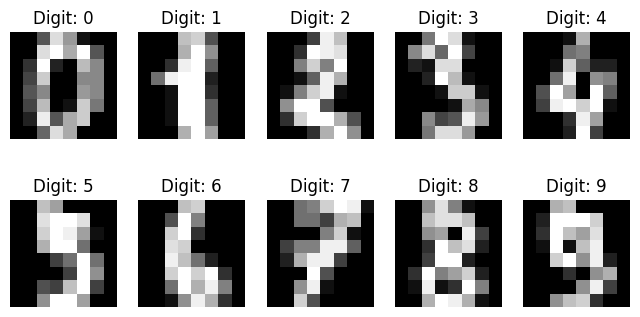

In [29]:
# Lets view our digit data(target)
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis("off")
plt.show()

In [30]:
# The data is in array format, lets convert to pandas dataframe to have a better view
X = digits.data  # Features (64-dimensional)
y = digits.target  # Labels (0-9)

In [31]:
# Convert the data to pandas dataframe and series
X = pd.DataFrame(X)
y = pd.Series(y)

In [32]:
# lets inpect the data
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [33]:
X.columns

RangeIndex(start=0, stop=64, step=1)

In [34]:
print(f'The rows is : { X.shape[0]}')
print(f"The columns is : {X.shape[1]}")

The rows is : 1797
The columns is : 64


In [35]:
# Lets make a copy of  X
X_dimensions = X.copy()

# CREATE an instance of your PCAC() class and choose the numbers of your principal components
# choose the numbers of your principal components(n_components)
pc = PCA(n_components=6)

# fit and transform the feratures to reflect the reduced dimensions
Reduced_X_Dimensions = pc.fit_transform(X_dimensions)

In [36]:
Reduced_X_Dimensions.shape

(1797, 6)

In [37]:
print(Reduced_X_Dimensions)

[[-1.25946645e+00 -2.12748835e+01  9.46305462e+00 -1.30141887e+01
   7.12882278e+00  7.44065876e+00]
 [ 7.95761130e+00  2.07686990e+01 -4.43950604e+00  1.48936644e+01
  -5.89624878e+00  6.48562213e+00]
 [ 6.99192297e+00  9.95598641e+00 -2.95855808e+00  1.22883024e+01
   1.81260233e+01  4.50766373e+00]
 ...
 [ 1.08012837e+01  6.96025223e+00 -5.59955453e+00  7.22773348e+00
   3.45964589e+00  1.23752041e+01]
 [-4.87210009e+00 -1.24239536e+01  1.01708664e+01  6.66885049e+00
  -3.56906108e+00  3.89671361e-03]
 [-3.44389631e-01 -6.36554919e+00 -1.07737085e+01  7.72621321e+00
   3.31061536e+00  3.04906344e+00]]


Using PCA() our features have been reduced from `64 features` to `6 features` and still keeping the re;levant information of the dataset 

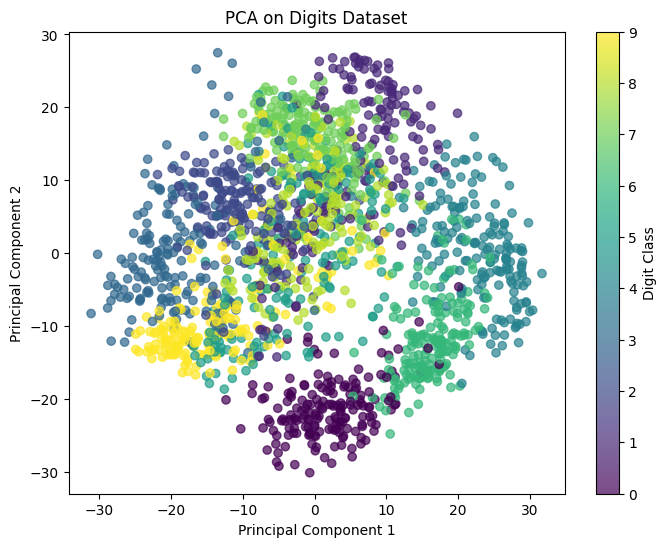

In [38]:

# LEts plot a scatter plot for our PCA results
# We will plot our first and second PCs  to see their relatedness
plt.figure(figsize=(8,6))
plt.scatter(Reduced_X_Dimensions[:, 0],Reduced_X_Dimensions[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label="Digit Class")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Digits Dataset")
plt.show()

In [43]:
# Import relevant libraries
import pandas as pd
import numpy as np

# lets import libraries for encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from category_encoders import BinaryEncoder
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
from category_encoders import WOEEncoder

In [39]:
%%capture
!pip install --upgrade category_encoders

In [40]:
# Load dataset from github raw
df = pd.read_csv("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/feature_encoding_full_dataset.csv")

In [41]:
df.head()

,Gender,Education Level,Marital Status,Employment Type,Country,Income
0,Male,PhD,Single,Part-time,Brazil,36787
1,Female,PhD,Single,Self-employed,USA,81949
2,Female,High School,Married,Unemployed,Germany,111999
3,Female,High School,Divorced,Part-time,Brazil,70043
4,Male,PhD,Widowed,Unemployed,South Africa,125156


In [44]:
# LEts encode gender
# This is a binary category(we can have label or binary encoding)
# Lets initialize LabelEncoder()

le = LabelEncoder()
df["gender_encoded"] = le.fit_transform(df["Gender"])

# Lets view the encoded against the actual data
df[["gender_encoded", "Gender"]] # male = 1, female = 0

,gender_encoded,Gender
0,1,Male
1,0,Female
2,0,Female
3,0,Female
4,1,Male
...,...,...
295,1,Male
296,0,Female
297,1,Male
298,1,Male


Encode Educaion Level

In [45]:
# LEts encode "Education Level"
# Lets view the unique categories
df["Education Level"].unique()# LEts encode "Education Level"


array(['PhD', 'High School', "Bachelor's", "Master's"], dtype=object)